In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Get the absolute path to the project root directory
project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)

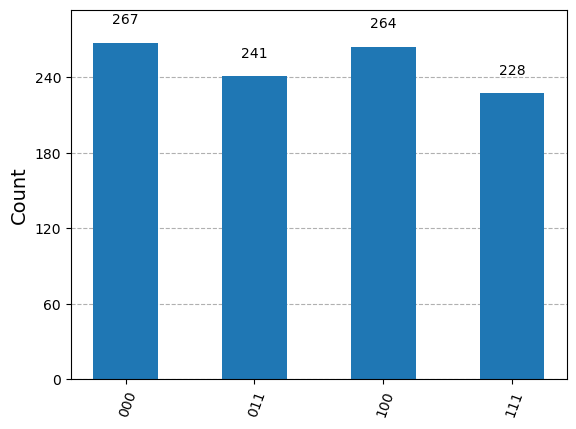


Quantum Enigma Results:
------------------------
State 000: 249683 times
  Guardian lying: q0
  q1 guardian points to: Right door
  q0 guardian points to: Right door
  Treasure is behind: Left door
  ---
State 011: 250825 times
  Guardian lying: q0
  q1 guardian points to: Left door
  q0 guardian points to: Left door
  Treasure is behind: Right door
  ---
State 111: 249764 times
  Guardian lying: q1
  q1 guardian points to: Left door
  q0 guardian points to: Left door
  Treasure is behind: Right door
  ---
State 100: 249728 times
  Guardian lying: q1
  q1 guardian points to: Right door
  q0 guardian points to: Right door
  Treasure is behind: Left door
  ---

Circuit Metrics:
---------------
depth: 14
width: 6
size: 17
count_ops: OrderedDict([('x', 6), ('cx', 5), ('barrier', 3), ('measure', 3), ('h', 2), ('swap', 1)])
num_qubits: 3
num_clbits: 3
num_ancillas: 0
num_parameters: 0
has_calibrations: False
has_layout: False

Success Analysis:
----------------
Mean success rate: 100.00%
St

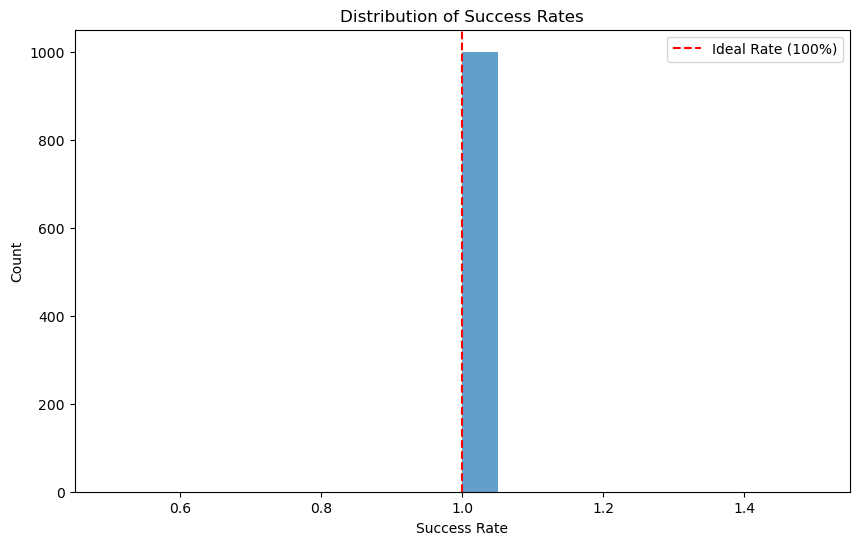


Circuit:


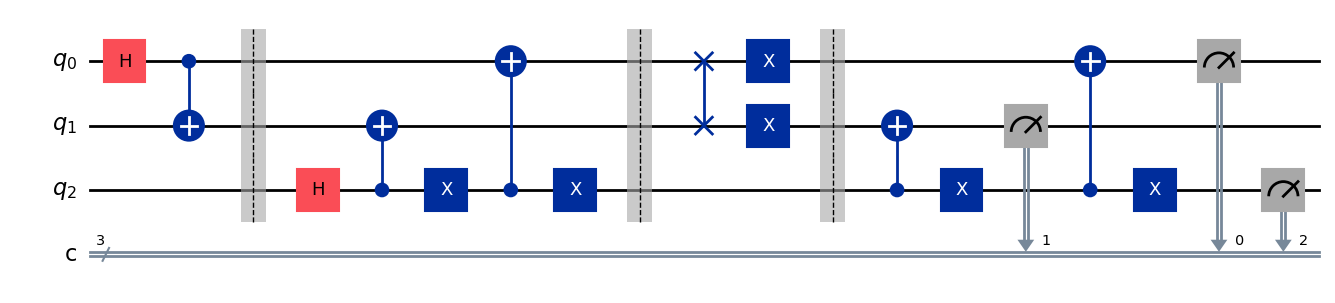

In [8]:
from quantum_enigma import solve_quantum_enigma

# Run the quantum enigma
validator = solve_quantum_enigma()
print("\nCircuit:")
validator.draw()

# qiskit

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

## Setup guardians

In [26]:
qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc = QuantumCircuit(qr, cr)
simulator = AerSimulator()

In [27]:
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

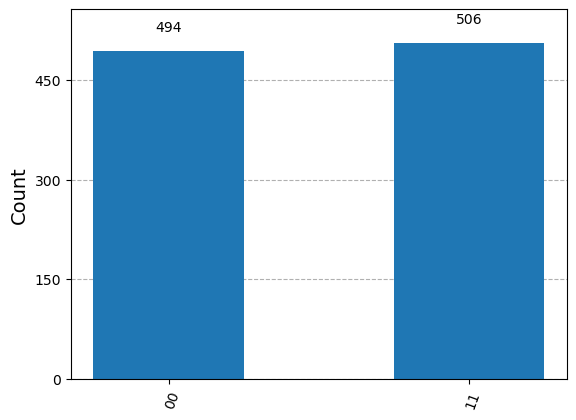

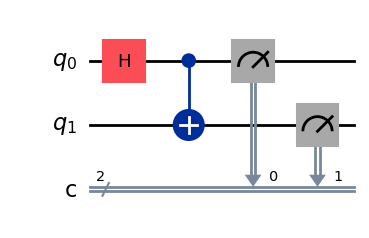

In [30]:
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output='mpl')
# 0 is right, 1 is left

## Setup Lie detector

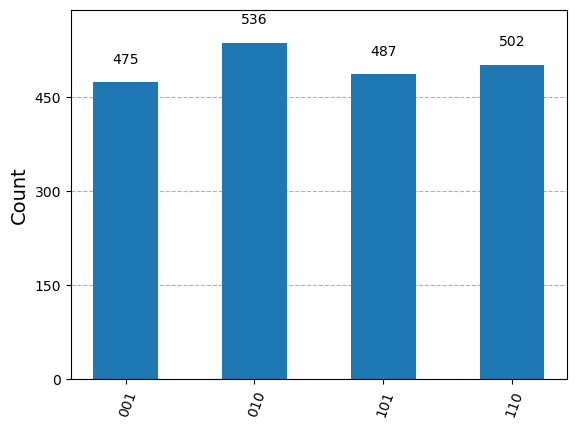

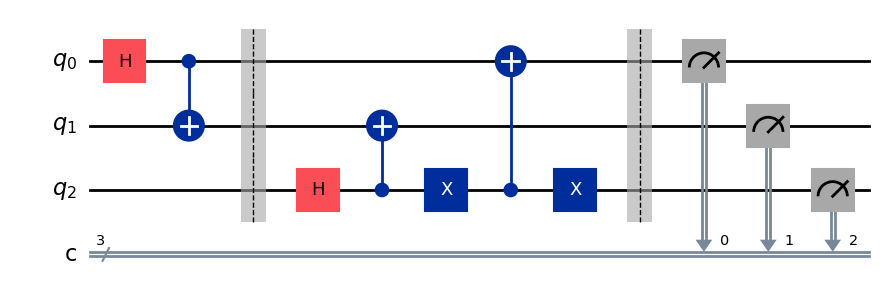

In [70]:
# 0 is right, 1 is left

# q2: Which guardian is lying (0=right, 1=left)
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)

# guardians
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# detector
qc.h(2)
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)
qc.barrier()
qc.measure([0, 1, 2], [0, 1, 2])

simulator = AerSimulator()
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output='mpl')

In [71]:
counts

{'101': 487, '110': 502, '001': 475, '010': 536}

| State | Lie Detector (q2) | Left Guardian (q1) | Right Guardian (q0) | Interpretation |
|-------|------------------|-------------------|-------------------|----------------|
| 101 | 1 (Left lying) | 0 (Right) | 1 (Left) | Right points to left, Left points to right, Left guardian is lying |
| 110 | 0 (Right lying) | 1 (Left) | 1 (Left) | Both point to left door, Right guardian is lying |
| 001 | 1 (Left lying) | 0 (Right) | 0 (Right) | Both point to right door, Left guardian is lying |
| 010 | 0 (Right lying) | 1 (Left) | 0 (Right) | Right points to right, Left points to left, Right guardian is lying |

# question setup

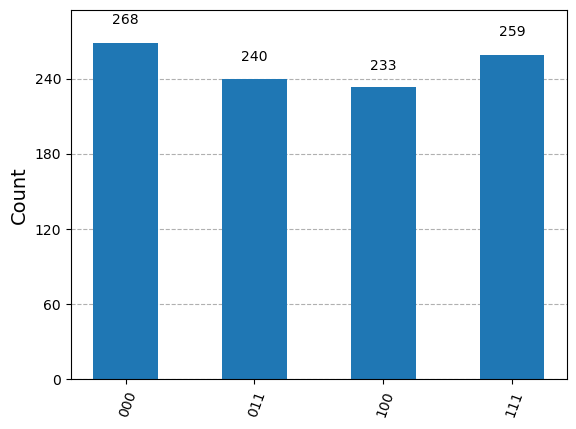

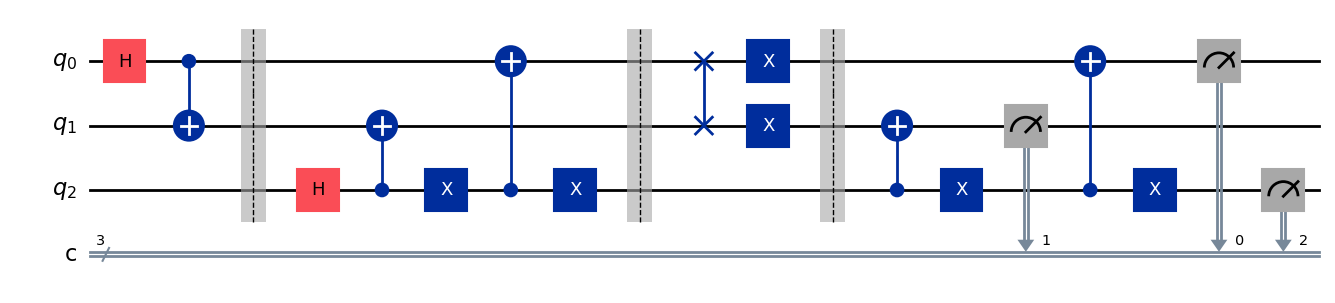

In [79]:
# which door would the other guarding tell me not to open?

# 0 is right, 1 is left

# q2: Which guardian is lying (0=right, 1=left)
qr = QuantumRegister(3, "q")
cr = ClassicalRegister(3, "c")
qc = QuantumCircuit(qr, cr)

# guardians
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# detector
qc.h(2)

# detect lier
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)

qc.barrier()

# question setup

# Apply the "what would the other guardian say" logic
# First, swap the guardians' knowledge
qc.swap(0, 1)  # Swap right and left guardian knowledge

# Apply NOT gates to represent "not to open"
qc.x(0)  # NOT on right guardian's answer
qc.x(1)  # NOT on left guardian's answer
qc.barrier()

# detect lier
qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)

qc.measure([0, 1, 2], [0, 1, 2])

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
display(plot_histogram(counts))
qc.draw(output='mpl')